# E-commerce-Mini-Project

### ผู้จัดทำ
#### - 6510400004 Unyawee Phanburananont         
#### - 6510400003 Phanuphong Siriphongwatana 

### ข้อมูล
ชุดข้อมูลเป็น Transaction ของข้อมูลสินค้าบนแพลตฟอร์ม E-commerce ที่เก็บเป็นรายชั่วโมง มีข้อมูลเกี่ยวกับ %ส่วนลด, ราคาสินค้า, ยี่ห้อสินค้า, การทำแฟลชเซล(Flash sale), จำนวนสินค้าในคลังสินค้า(Stock) เป็นต้น

ระยะเวลาของข้อมูล: 2022-09 ถึง 2023-03


### คำถาม

สำรวจเกี่ยวกับการทำแฟลชเซลของสินค้า  แคมเปญการขาย สินค้าแต่ละเเบรนด์ และการลดราคากับสต็อกสินค้า

1. วันและเวลา 10 อันดับแรกที่มีการทำแฟลชเซลบ่อยที่สุด
2. เปรียบเทียบ 3 แคมเปญลดราคาสินค้า ว่าแคมเปญไหนมีการทำแฟลชเซลบ่อยที่สุด
3. PayDay แคมเปญมีระยะเวลาที่จัดแคมเปญหลายวันกว่าแคมเปญอื่นๆ จึงดูเพิ่มว่า ช่วงวันและเวลาไหนที่นิยมทำแฟลชเซล
4. แต่ละแคมเปญส่วนมากทำแฟลชเซลกี่ชั่วโมงโดยเฉลี่ย
5. แต่ละแคมเปญมีพฤติกรรมการทำแฟลชเซลช่วงเวลาไหนเท่าไหร่บ้าง
6. สำรวจแบรนด์สินค้าที่เป็นร้านค้าทางการเทียบกับร้านค้าไม่ทางการว่ามีพฤติกรรมการลดราคาในแต่ละแคมเปญแตกต่างกันหรือไม่
7. ความสัมพันธ์ของการลดราคากับจำนวนสินค้าที่ขายได้

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('Ecommerce_mini_project.csv')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316949 entries, 0 to 316948
Data columns (total 84 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   item_type                               316949 non-null  int64  
 1   discount                                303991 non-null  object 
 2   price_min                               316949 non-null  int64  
 3   item_has_video                          316949 non-null  object 
 4   userid                                  316949 non-null  int64  
 5   liked                                   316949 non-null  object 
 6   is_pre_order                            316949 non-null  object 
 7   is_adult                                316949 non-null  object 
 8   scraped_datetime                        316949 non-null  object 
 9   model_name                              289103 non-null  object 
 10  price                                   3169

In [87]:
df.describe()

,item_type,price_min,userid,price,stock,price_min_before_discount,price_before_discount,cod_flag,modelid,price_max_before_discount,...,catid,historical_sold,current_promotion_reserved_stock,is_cc_installment_payment_eligible,sold,discount_stock,other_stock,raw_discount,promotionid,badge_icon_type
count,316949.0,316949.000000,316949.0,316949.000000,316949.000000,304653.000000,316949.000000,316949.000000,3.169490e+05,304653.000000,...,316949.000000,316949.000000,316949.000000,316829.000000,316949.000000,316949.000000,316949.000000,316949.000000,3.169490e+05,316949.000000
mean,0.0,5826.871629,0.0,6842.930992,231.559229,8929.532304,8110.809812,0.682763,1.168458e+11,10908.731698,...,100215.086799,5087.556067,6.562964,0.390766,221.332684,2589.093356,173.168989,39.384343,4.862378e+14,0.233470
std,0.0,7304.720851,0.0,8015.321658,804.860872,12014.080406,12023.332042,0.465401,4.989618e+10,13552.015133,...,290.707979,13890.012883,48.039579,0.487923,538.543273,6834.859107,1520.610166,17.383550,2.981477e+14,1.430638
min,0.0,131.000000,0.0,131.000000,0.000000,230.000000,0.000000,0.000000,3.471427e+09,230.000000,...,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.0,1359.000000,0.0,1699.000000,1.000000,1999.000000,1899.000000,0.000000,8.036762e+10,2990.000000,...,100010.000000,219.000000,0.000000,0.000000,12.000000,51.000000,0.000000,26.000000,1.141186e+14,0.000000
50%,0.0,3489.000000,0.0,4499.000000,23.000000,5990.000000,3499.000000,1.000000,1.231928e+11,6999.000000,...,100013.000000,1168.000000,0.000000,0.000000,45.000000,234.000000,0.000000,44.000000,6.677588e+14,0.000000
75%,0.0,7610.000000,0.0,9490.000000,194.000000,9999.000000,9999.000000,1.000000,1.526733e+11,13086.000000,...,100631.000000,3976.000000,0.000000,1.000000,142.000000,811.000000,0.000000,54.000000,6.802253e+14,0.000000
max,0.0,114642.000000,0.0,122842.000000,67029.000000,125310.000000,134274.000000,1.000000,2.307300e+11,134274.000000,...,100637.000000,102765.000000,1179.000000,1.000000,3719.000000,263871.000000,31439.000000,94.000000,7.089141e+14,9.000000


## 3 Type campaign

campaign คือมหกรรมการลดราคาของ platform ที่การให้โค้ดส่วนลดมากมายและการทำ flash sale ของร้านค้า

Shopee มีทั้งหมด 3 แคมเปญหลักๆ ดังนี้

### 1. Mega Sale
วันที่ วันกับเดือนตรงกัน เช่น 11.11 , 12.12 เป็นต้น
<img src="./img/mega_sale.jpg" alt= “” width="500" height="300">


### 2. Mid Month Sale
แคมเปญทุกกลางเดือน จัดทุกวันที่ 15 ของเดือน
<img src="./img/mid_month.jpg" alt= “” width="500" height="300">

### 3. Pay Day Sale
แคมเปญปลายเดือน ส่วนมากจะจัดหลายวันตั้งแต่วันที่ 25-สิ้นเดือน
<img src="./img/pay_day.jpg" alt= “” width="500" height="300">

ทุกเดือนจะทำทั้ง 3 campaign แตกต่างกันที่วันที่ และจะมีร้านค้าการทำ flash sale ร่วมด้วย (Flash sale ไม่จำเป็นต้องทำภายใน 3 campaign นี้แต่สามารถทำได้ตลอดเวลาและทุกๆวัน)

# Understand and prepare Data Part

itemid = id ของสินค้าใน 1 url สินค้า
modelid = id ของตัวเลือกสินค้าใน itemid

itemid มีได้หลาย modelid เพราะ 1 สินค้าสามารถมีได้หลายตัวเลือกสินค้า 

In [88]:
df[['itemid','modelid']]

,itemid,modelid
0,13374366434,134017795683
1,13374366434,134017795684
2,11385534326,134017787145
3,11385534326,134017787146
4,4950629721,58328468873
...,...,...
316944,9723579733,142390562339
316945,9723579733,142390562340
316946,9723579733,48355102339
316947,9723579733,48355102340


จากคำถามเราต้องการวิเคราะห์เกี่ยวกับการทำแฟลชเซลสินค้า เนื่องจาก API ของ Shopee มีการ return ค่าของแฟลชเซลออกมาตาม itemid ทำให้ ทุก modelid จะถูกเหมาะรวมว่าทำแฟลชเซลถึงแม้ modelid นั้นจะไม่ได้มีการทำแฟลชเซลก็ตาม 
ดังนั้นเราจึงทำการเลือกเฉพาะข้อมูล itemid ที่มีเฉพาะ modelid เดียวมาทำการวิเคราะห์ต่อเท่านั้น

In [89]:
list(df.sort_values(['brand'])['brand'].unique())

['Amazfit (อเมซฟิต)',
 'Baseus(เบซิอัส)',
 'Ecovacs(อีโคแวคส์)',
 'Haier(ไฮเออร์)',
 'Life Space (ไลฟ์สเปซ)',
 'Mister Robot(มิสเตอร์โรบอต)',
 'Pando(แพนโด้)',
 'Papifeed(ปาปิฟีด)',
 'Petkit(เพ็ทคิต)',
 'Petkit(เพ็ทคิท)',
 'Redmi(เรดมี่)',
 'Roborock(โรโบร็อค)',
 'Xiaomi(เสี่ยวมี่)',
 'iRobot(ไอโรบอท)',
 nan]

In [90]:
unique_id = []
for i in df['itemid'].unique().tolist():
    if len(df[df['itemid']==i]['modelid'].unique()) == 1:
#         print(i)
        unique_id.append(i)
df['brand'] = df['brand'].replace('Petkit(เพ็ทคิต)','Petkit(เพ็ทคิท)')
df = df[df['itemid'].isin(unique_id)].reset_index(drop=True)
df = df.sort_values(by=['ingest_date'],ascending=True)
df = df.drop_duplicates()

In [91]:
def extract_date_hour(row):
    date = datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
    return date.strftime('%d-%H')

def extract_year(row):
    date = datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
    return date.strftime('%Y')

def extract_mega_sale(row):
    date = datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
    if date.strftime('%m') == date.strftime('%d'):
        return True
    else:
        return False

In [92]:
df['year'] = df['ingest_date'].apply(extract_year)
df['day_hour'] = df['ingest_date'].apply(extract_date_hour)
df['mega_sale'] = df['ingest_date'].apply(extract_mega_sale)

ตรวจจสอบพฤติกรรมของข้อมูลในแต่ละปี เพื่อดูคุณภาพของข้อมูลก่อนการทำไปวิเคราะห์

In [93]:
df['year'].unique()

array(['2022', '2023'], dtype=object)

In [94]:
print(len(df[df['year']=='2022']))
df[df['year']=='2022'][['itemid','modelid','ingest_date','day_hour']].sort_values(by=['itemid','ingest_date'])[:10]

30679


,itemid,modelid,ingest_date,day_hour
2987,845016064,42157405015,2022-10-07 10:00:01,07-10
4622,845016064,42157405015,2022-10-07 12:00:01,07-12
6063,845016064,42157405015,2022-10-07 13:00:02,07-13
7668,845016064,42157405015,2022-10-07 14:00:01,07-14
11112,845016064,42157405015,2022-10-07 15:00:01,07-15
13232,845016064,42157405015,2022-10-07 16:00:02,07-16
18257,845016064,42157405015,2022-10-07 17:00:01,07-17
22276,845016064,42157405015,2022-10-07 18:00:02,07-18
16966,845016064,42157405015,2022-10-07 19:00:01,07-19
18085,845016064,42157405015,2022-10-07 20:00:02,07-20


In [95]:
print(len(df[df['year']=='2023']))
df[df['year']=='2023'][['itemid','modelid','ingest_date','day_hour']].sort_values(by=['itemid','ingest_date'])[:10]

1194


,itemid,modelid,ingest_date,day_hour
36417,845016064,42157405015,2023-01-19 09:21:47,19-09
36419,2177325629,22934228784,2023-01-19 09:21:47,19-09
28899,2177325629,22934228784,2023-01-19 12:00:01,19-12
24336,2177325629,22934228784,2023-01-19 15:00:05,19-15
24339,2177325629,22934228784,2023-01-20 09:00:08,20-09
26153,2177325629,22934228784,2023-01-20 12:00:07,20-12
24573,2177325629,22934228784,2023-01-20 15:00:07,20-15
24389,2177325629,22934228784,2023-01-23 15:00:01,23-15
32660,2177325629,22934228784,2023-01-23 18:00:02,23-18
32666,2177325629,22934228784,2023-01-23 21:00:01,23-21


จากการดูแยกปี 2022 กับ 2023 จะพบว่า 2022 มี transaction ทุกๆ1 ชั่วโมง ส่วน 2023 จะเป็น transaction ทุกๆ3ชั่วโมง
ทำให้ข้อมูลปี 2023 อาจจะข้ามช่วงเวลาการทำแฟลชเซลไปอาจจะทำให้ข้อมูลคลาดเคลื่อนกันของทั้ง2ปี
เราจึงเลือกที่จะตัดข้อมูลของปี 2023 ออกเนื่องจากเราต้องการนำแฟลชเซลมาวิเคราะห์ถึงระยะเวลาและจำนวน trnsasction ที่เกิดขึ้น

Text(0, 0.5, 'Count row of data')

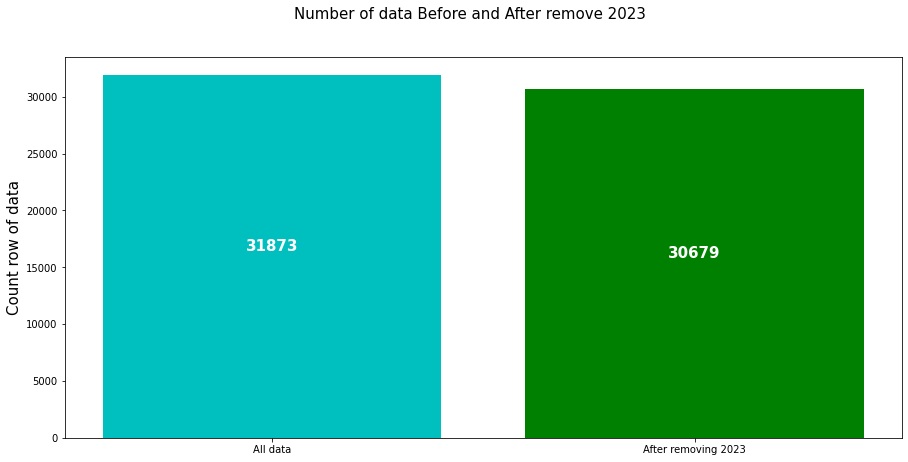

In [12]:
fig = plt.figure(figsize = (15, 7))
freq = plt.bar(['All data','After removing 2023'], [len(df),len(df[df['year']!='2023'])], color =['c','green'])

for f in freq:
    height = f.get_height()
    plt.annotate(f'{height:.0f}',
                xy=(f.get_x() + f.get_width() / 2, height/2),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=15,color='white', weight='bold')
    
fig.suptitle('Number of data Before and After remove 2023', fontsize=15)
plt.ylabel('Count row of data', fontsize=15)

In [13]:
df = df[df['year']!='2023']

## 1.Top 10 flash sale frequency by day_hour
วันและเวลา 10 อันดับแรกใดที่มีการทำแฟลชเซลบ่อยที่สุด

#### Filter only transaction that have flash sale
เตรียมข้อมูลเพื่อวิเคราะห์สินค้าที่ทำแฟลชเซล โดยสินค้าที่มีการทำแฟลชเซล ดูจากคอลัมน์ Flash_sale ที่ค่าไม่ใช่ค่าว่าง

In [14]:
df['flash_sale'].unique()[:10]

array([nan,
       "{'price_before_discount': 1999900000, 'hidden_price_display': None, 'end_time': 1662663600, 'flash_sale_stock': 100, 'promotionid': 107390517342208, 'lowest_past_price': None, 'promo_images': ['60aaea4fe52b112fca2bf6c02bf52da8'], 'start_time': 1662656400, 'promo_overlay_image': 'f85173f31d3776172d6999ad5a8d39e4', 'extra_discount_info': None, 'flash_sale_type': 0, 'price': 1499000000, 'stock': 100}",
       "{'price_before_discount': 2141900000, 'hidden_price_display': None, 'end_time': 1662663600, 'flash_sale_stock': 30, 'promotionid': 674535842344547, 'lowest_past_price': None, 'promo_images': None, 'start_time': 1662656400, 'promo_overlay_image': None, 'extra_discount_info': None, 'flash_sale_type': 2, 'price': 1190000000, 'stock': 30}",
       "{'price_before_discount': 1700000000, 'hidden_price_display': None, 'end_time': 1662663600, 'flash_sale_stock': 50, 'promotionid': 108652700917760, 'lowest_past_price': None, 'promo_images': ['4be03248bfbc47be3234d3a451b79

เราจะเลือกเฉพาะ Transaction ที่มีการทำแฟลชเซล

In [15]:
flash_sale = df[df['flash_sale'].notnull()]
print('Number of records:',len(df))
print('Number of records after filter only flash sale:',len(flash_sale))

Number of records: 30679
Number of records after filter only flash sale: 1197


In [16]:
flash_sale = df.drop_duplicates(subset=['flash_sale'])
fs_groupby_DH = flash_sale.groupby(['modelid','day_hour'])[['day_hour']].count()

In [17]:
fs_groupby_DH = fs_groupby_DH.rename(columns = {'day_hour':'count_dh'})

In [18]:
fs_groupby_DH = fs_groupby_DH.reset_index()

In [20]:
most_flash_sale = fs_groupby_DH.groupby(['day_hour'])[['count_dh']].sum().reset_index()

In [22]:
most_flash_sale = most_flash_sale.sort_values(by=['count_dh'],ascending=False).reset_index()
most_flash_sale

,index,day_hour,count_dh
0,206,25-00,10
1,113,15-00,10
2,129,15-21,9
3,263,30-12,9
4,93,11-00,8
...,...,...,...
276,136,16-15,1
277,138,17-00,1
278,139,17-01,1
279,1,01-04,1


Text(0, 0.5, 'count transaction of flash sale')

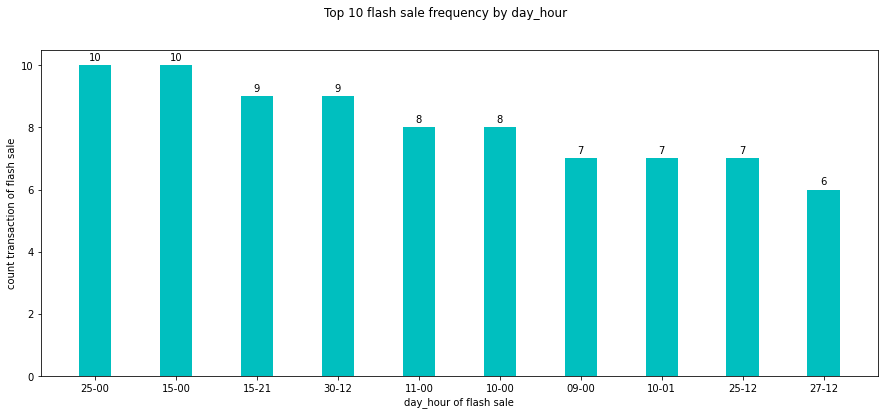

In [23]:
fig = plt.figure(figsize = (15, 6))
freq = plt.bar(most_flash_sale['day_hour'][:10], most_flash_sale['count_dh'][:10], color ='c',
        width = 0.4)

for f in freq:
    height = f.get_height()
    plt.annotate(f'{height:.0f}',
                xy=(f.get_x() + f.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
fig.suptitle('Top 10 flash sale frequency by day_hour')
plt.xlabel('day_hour of flash sale')
plt.ylabel('count transaction of flash sale')

วันและเวลาที่มีการทำแฟลชเซลบ่อยที่สุดโดยนับจาก Transaction ของสินค้าที่มีการทำแฟลชเซล คือวันที่ 25 เที่ยงคืนกับ 15 เที่ยงคืน (เนื่องจาก 25 เป็นวันที่จัด PayDay campaign และ 15 เป็นวันที่จัด Mid month campaign)

##  2. Compare 3 sales campaigns

เปรียบเทียบ 3 แคมเปญลดราคาสินค้า หาว่าแคมเปญไหนมีการทำแฟลชเซลบ่อยที่สุด

In [24]:
# Extract day and hour from day_hour
df['day'] = df['day_hour'].apply(lambda x : x.split('-')[0]).astype(int)
df['hour'] = df['day_hour'].apply(lambda x : x.split('-')[1]).astype(int)

### Create 3 new dataframe by sale campaign

In [25]:
mega_sale_df = df[(df['mega_sale']==True)&(df['flash_sale'].notna())].drop_duplicates(subset=['flash_sale'],keep='first').reset_index(drop=True)
mega_sale_fr = len(mega_sale_df)
mega_sale_fr

98

In [26]:
mid_month_sale_df = df[(df['day']==15)&(df['flash_sale'].notna())].drop_duplicates(subset=['flash_sale'],keep='first').reset_index(drop=True)
mid_month_sale_fr = len(mid_month_sale_df)
mid_month_sale_fr

60

In [27]:
pay_day_sale_df = df[(df['day']>=25)&(df['flash_sale'].notna())].drop_duplicates(subset=['flash_sale'],keep='first').reset_index(drop=True)
pay_day_sale_fr = len(pay_day_sale_df)
pay_day_sale_fr

151

Text(0, 0.5, 'Count transaction of flash sale')

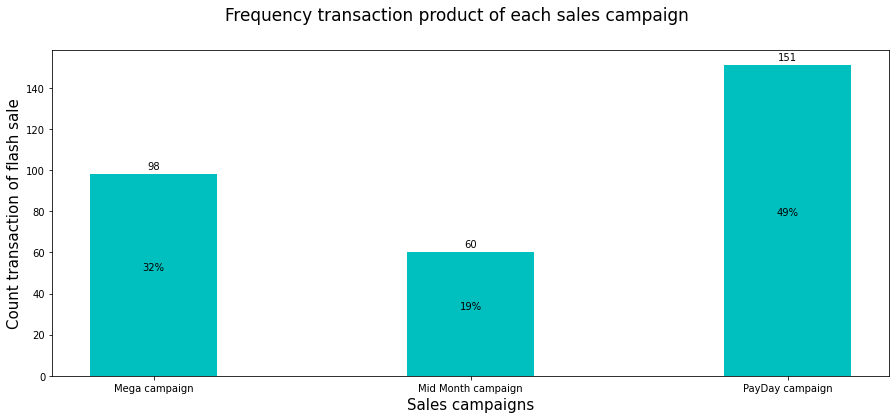

In [28]:
fig = plt.figure(figsize = (15, 6))
freq = plt.bar(['Mega campaign','Mid Month campaign','PayDay campaign'], [mega_sale_fr,mid_month_sale_fr,pay_day_sale_fr], color ='c',
        width = 0.4)
all_freq = 0   #mega_sale_fr+mid_month_sale_fr+pay_day_sale_fr
for i in freq:
    height = i.get_height()
#     print(height)
    all_freq+= height
    
# print(all_freq)
for f in freq:
    height = f.get_height()
    plt.annotate(f'{height:.0f}',
                xy=(f.get_x() + f.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
    plt.annotate(f'{((height)/all_freq*100):.0f}%',
                xy=(f.get_x() + f.get_width() / 2, height/2),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
fig.suptitle('Frequency transaction product of each sales campaign', fontsize=17)
plt.xlabel('Sales campaigns', fontsize=15)
plt.ylabel('Count transaction of flash sale', fontsize=15)

ภาพรวมของแต่ละแคมเปญที่มีการทำแฟลชเซล Payday แคมเปญมีการทำแฟลชเซลเยอะที่สุดเนื่องจากมีการจัดแคมเปญหลายวัน รองลงมาคือ Mega sale แคมเปญ

## 3. Details of Payday campaign (Payday campaign has several campaign periods.)
PayDay แคมเปญมีระยะเวลาที่จัดแคมเปญหลายวันกว่าแคมเปญอื่นๆ จึงดูเพิ่มว่าช่วงวันและเวลาไหนที่นิยมทำแฟลชเซล

### 3.1 Frequency by hour

Text(0, 0.5, 'Count transaction of flash sale')

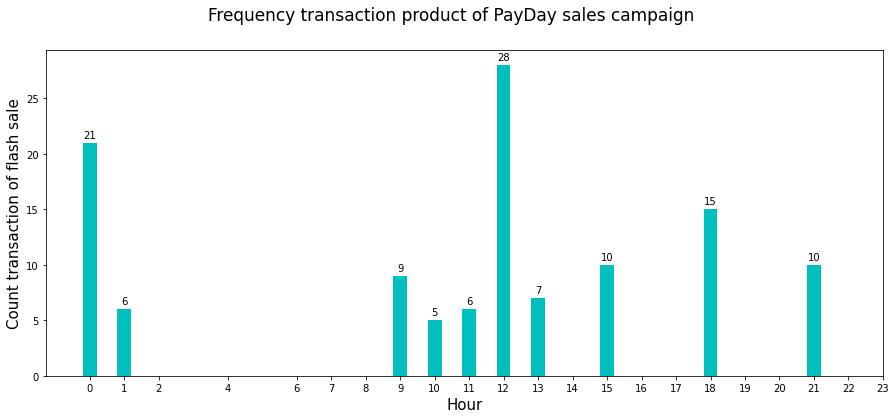

In [29]:
pay_day_sale = df[(df['day']>=25)&(df['flash_sale'].notna())].drop_duplicates(subset=['flash_sale'],keep='first').groupby(['hour'])[['hour']].count().rename(columns={'hour':'count'}).reset_index()
pay_day_sale = pay_day_sale.sort_values(by=['count'],ascending=False).reset_index()
pay_day_sale

fig = plt.figure(figsize = (15, 6))
freq = plt.bar(pay_day_sale['hour'][:10], pay_day_sale['count'][:10], color ='c',
        width = 0.4)

for f in freq:
    height = f.get_height()
    plt.annotate(f'{height:.0f}',
                xy=(f.get_x() + f.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
_ = plt.xticks(pay_day_sale['hour'])
fig.suptitle('Frequency transaction product of PayDay sales campaign', fontsize=17)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Count transaction of flash sale', fontsize=15)

### 3.2 Frequency by day

Text(0, 0.5, 'Count transaction of flash sale')

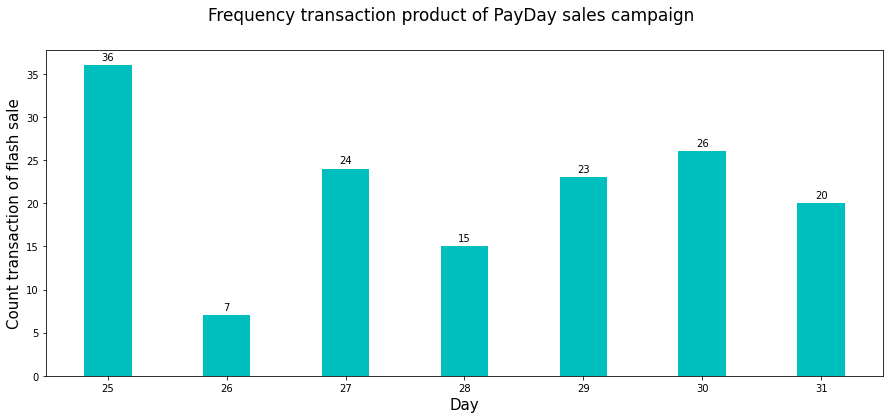

In [30]:
pay_day_sale = df[(df['day']>=25)&(df['flash_sale'].notna())].drop_duplicates(subset=['flash_sale'],keep='first').groupby(['day'])[['day']].count().rename(columns={'day':'count'}).reset_index()
pay_day_sale = pay_day_sale.sort_values(by=['count'],ascending=False).reset_index()
pay_day_sale

fig = plt.figure(figsize = (15, 6))
freq = plt.bar(pay_day_sale['day'][:10], pay_day_sale['count'][:10], color ='c',
        width = 0.4)

for f in freq:
    height = f.get_height()
    plt.annotate(f'{height:.0f}',
                xy=(f.get_x() + f.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
_ = plt.xticks(pay_day_sale['day'])
fig.suptitle('Frequency transaction product of PayDay sales campaign', fontsize=17)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Count transaction of flash sale', fontsize=15)

###  3.3 Frequency by day and hour

Text(0, 0.5, 'Count transaction of flash sale')

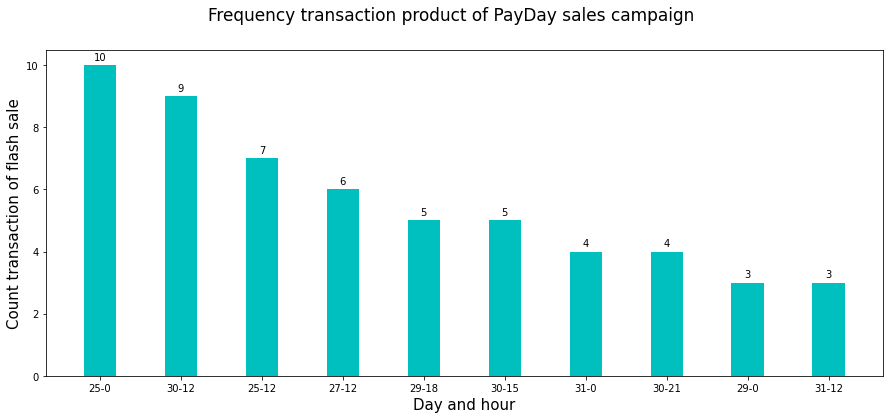

In [31]:
pay_day_sale = df[(df['day']>=25)&(df['flash_sale'].notna())].drop_duplicates(subset=['flash_sale'],keep='first').groupby(['day','hour'])[['hour']].count().rename(columns={'hour':'count'}).reset_index()
pay_day_sale['day_hour'] = pay_day_sale['day'].astype(str) +'-' +pay_day_sale['hour'].astype(str)
pay_day_sale = pay_day_sale.sort_values(by=['count'],ascending=False).reset_index()

fig = plt.figure(figsize = (15, 6))
freq = plt.bar(pay_day_sale['day_hour'][:10], pay_day_sale['count'][:10], color ='c',
        width = 0.4)

for f in freq:
    height = f.get_height()
    plt.annotate(f'{height:.0f}',
                xy=(f.get_x() + f.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
fig.suptitle('Frequency transaction product of PayDay sales campaign', fontsize=17)
plt.xlabel('Day and hour', fontsize=15)
plt.ylabel('Count transaction of flash sale', fontsize=15)

แคมเปญการขาย PayDay

3.1 ชั่วโมงที่นิยมทำแฟลชเซลคือ 12:00 น. 00:00 น. 18:00 น. และ 15:00 น. ตามลำดับ พฤติกรรมการขายส่วนใหญ่จะห่างกันทุกสามชั่วโมง

3.2 วันที่ขายแฟลชสูงสุดในช่วง Payday คือวันที่ 25 (วันแรกของแคมเปญการขาย PayDay), 30, 27 ตามลำดับ

3.3 วันและชั่วโมงการขายแฟลชสูงสุดในช่วง Payday คือ 25-00:00 น., 30-12:00 น., 25-12:00 น., 27-12:00 น. ตามลำดับ

# 4. Flash sale duration time 

แต่ละแคมเปญส่วนมากทำแฟลชเซลกี่ชั่วโมงโดยเฉลี่ย

In [32]:
def extract_duration(row):
    flash_sale_dict = eval(row)
    temp = datetime.fromtimestamp(flash_sale_dict['end_time']) - datetime.fromtimestamp(flash_sale_dict['start_time'])
    return temp.seconds//3600

In [33]:
mega_sale_df['duration'] = mega_sale_df['flash_sale'].apply(extract_duration)
mega_sale_df['duration'].mean()

2.693877551020408

In [34]:
mid_month_sale_df['duration'] = mid_month_sale_df['flash_sale'].apply(extract_duration)
mid_month_sale_df['duration'].mean()

3.5166666666666666

In [35]:
pay_day_sale_df['duration'] = pay_day_sale_df['flash_sale'].apply(extract_duration)
pay_day_sale_df['duration'].mean()

7.529801324503311

Text(0, 0.5, 'Duration time (Hours)')

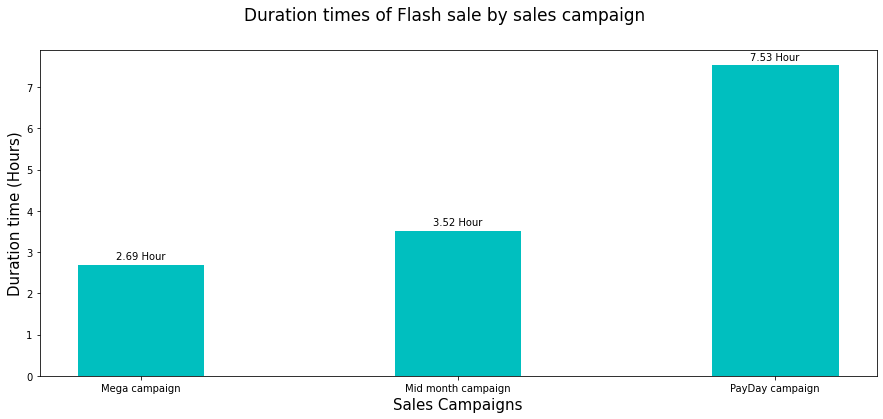

In [36]:
fig = plt.figure(figsize = (15, 6))
freq = plt.bar(['Mega campaign','Mid month campaign','PayDay campaign'],
        [mega_sale_df['duration'].mean(),mid_month_sale_df['duration'].mean(),pay_day_sale_df['duration'].mean()], 
        color ='c',
        width = 0.4)

for f in freq:
    height = f.get_height()
    plt.annotate(f'{height:.2f} Hour',
                xy=(f.get_x() + f.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
fig.suptitle('Duration times of Flash sale by sales campaign', fontsize=17)
plt.xlabel('Sales Campaigns', fontsize=15)
plt.ylabel('Duration time (Hours)', fontsize=15)

PayDay มีการทำแฟลชเซลระยะเวลานานที่สุดคือประมาณ 8 ชั่วโมงต่อการทำแฟลชเซล1ครั้ง
รองลงมาด้วย Mid month แคมเปญ คือ4 ชั่วโมงและ Mega 3ชั่วโมง

จากการสำรวจข้อมูลพบว่า Mega sale จะแฟลชเซลในระยะสั้นกว่าและมีจำนวนการแฟลชเซลบ่อยกว่า Mid month sale

## 5. Pattern of the flash sale hour of each campaign.
แต่ละแคมเปญมีพฤติกรรมการทำแฟลชเซลช่วงเวลาไหนเท่าไหร่บ้าง

In [37]:
def groupby_time_series(df):
    flash_hour_df= pd.DataFrame()
    hour = []
    modelid = []
    for i in range(len(df)) :
        fs_dict = eval(df['flash_sale'].loc[i])
        fs_dict['start_time']
        for h in range(int(datetime.fromtimestamp(fs_dict['start_time']).strftime('%H')),int(datetime.fromtimestamp(fs_dict['end_time']).strftime('%H'))+1):
            modelid.append(df['modelid'].loc[i])
            hour.append(h)
    flash_hour_df['modelid'] = modelid
    flash_hour_df['hour'] = hour
    flash_hour_groupby = flash_hour_df.groupby(['hour'])[['modelid']].count().reset_index()
    for i in range(0,24):
        if i not in flash_hour_groupby['hour'].unique().tolist():
#             print(i)
            flash_hour_groupby = flash_hour_groupby.append(pd.Series({'hour': i, 'modelid':0}),ignore_index=True)
    return flash_hour_groupby

In [38]:
mega_sale_timeseries =  groupby_time_series(mega_sale_df)
mid_month_timeseries =  groupby_time_series(mid_month_sale_df)
pay_day_timeseries =  groupby_time_series(pay_day_sale_df)

Text(0, 0.5, 'Number of transactions')

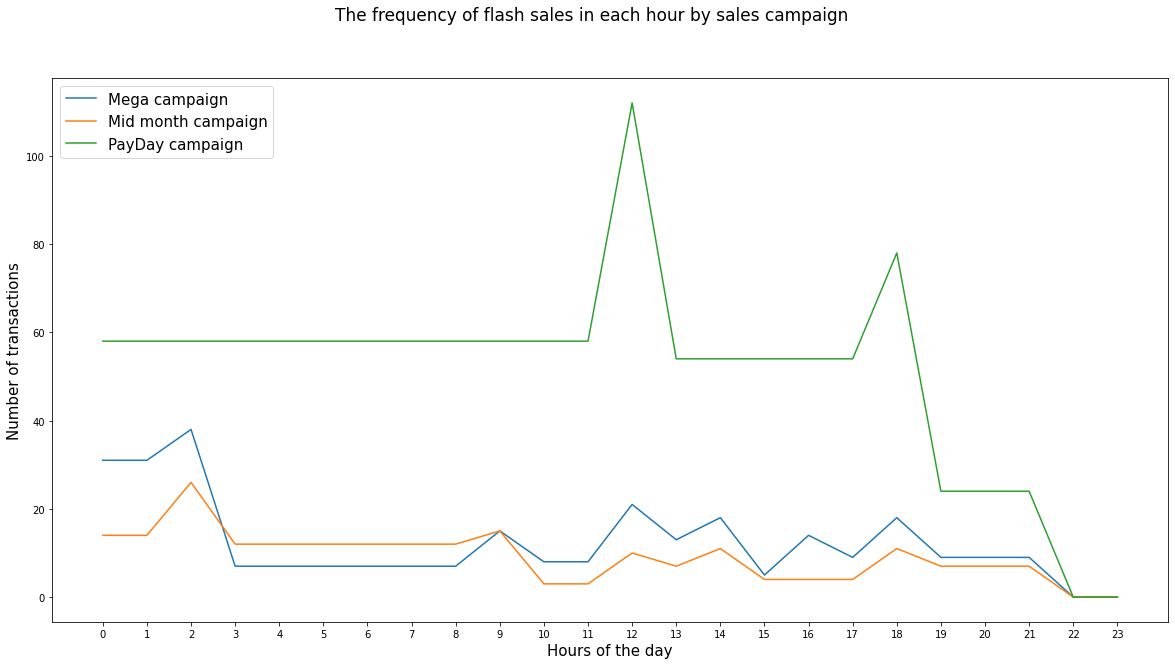

In [39]:
fig = plt.figure(figsize = (20, 10))
plt.plot(mega_sale_timeseries['hour'], mega_sale_timeseries['modelid'],label="Mega campaign")
plt.plot(mid_month_timeseries['hour'], mid_month_timeseries['modelid'],label="Mid month campaign")
plt.plot(pay_day_timeseries['hour'], pay_day_timeseries['modelid'],label="PayDay campaign")
_ = plt.xticks(mega_sale_timeseries['hour'])
plt.legend(loc="upper left",prop={'size':15})
    
fig.suptitle('The frequency of flash sales in each hour by sales campaign', fontsize=17)
plt.xlabel('Hours of the day', fontsize=15)
plt.ylabel('Number of transactions', fontsize=15)

ภาพรวมของการขายแฟลชเป็นที่นิยมในช่วงเวลา 02:00 น. (อาจเริ่มขายแฟลชเซลตั้งแต่เที่ยงคืนหรือ 01.00 น.) รองลงมาคือ 9.00 น., 12.00 น., 14.00 น., 16.00 น., 18.00 น. ตามลำดับ 

ตามแคมเปญ Mega Campaign และ Mid month Campaign จะมี flash sale ในแต่ละช่วงใกล้เคียงกันและเน้นทำแฟลชเซลช่วงกลางคืน. 
สำหรับแคมเปญ Payday จะมีรูปแบบที่แตกต่างไปคือจะมีการขายแฟลชมากที่สุดในตอนกลางวัน ที่เวลา 12:00 น. และอีกครั้งเวลา 18:00 น.

# 6. Explore by Brand 
สำรวจแบรนด์สินค้าที่เป็น Official เทียบกับแบรนด์ Unofficial ว่ามีพฤติกรรมการลดราคาในแต่ละแคมเปญแตกต่างกันหรือไม่


Explore the discounting behavior of brands selling on the platform.

In [40]:
brand = [i for i in df['brand'].dropna().unique().tolist()]

brand_count = [len(df[df['brand']==i]['shopid'].unique()) for i in brand]
brand_count

[9, 4, 3, 1, 1, 3, 2, 1]

In [41]:
df_brand = pd.DataFrame()
df_brand['brand'] = brand
df_brand['countd_shopid'] = [len(df[df['brand']==i]['shopid'].unique()) for i in brand]
df_brand['count_shopid']  = [len(df[df['brand']==i]['shopid']) for i in brand]
df_brand

,brand,countd_shopid,count_shopid
0,Petkit(เพ็ทคิท),9,11140
1,Amazfit (อเมซฟิต),4,4417
2,Xiaomi(เสี่ยวมี่),3,6529
3,iRobot(ไอโรบอท),1,1082
4,Pando(แพนโด้),1,2234
5,Haier(ไฮเออร์),3,3027
6,Ecovacs(อีโคแวคส์),2,1493
7,Mister Robot(มิสเตอร์โรบอต),1,756


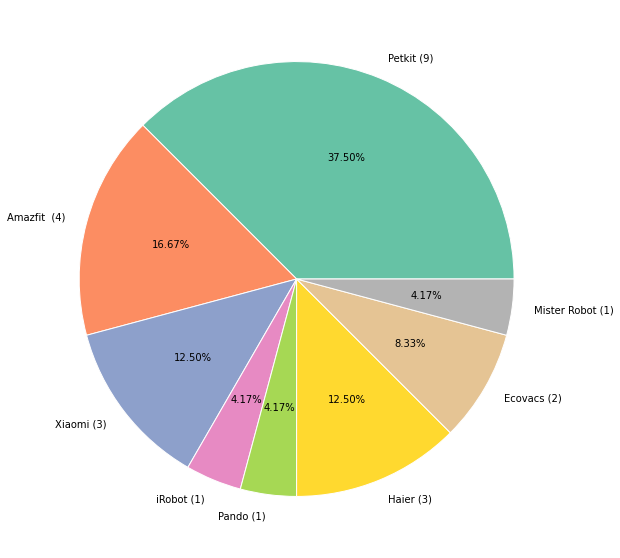

In [42]:
fig = plt.figure(figsize = (15, 10))
label = [i.split('(')[0]+' ('+str(brand_count[index])+')' for index,i in enumerate(brand)]

_ = plt.pie(brand_count, labels = label , autopct=lambda p: '{:.2f}%'.format(p), textprops={'fontsize': 10}, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },colors=sns.color_palette('Set2'))

แบรนด์ Petkit มีจำนวนร้านค้ามากที่สุด (มีการแข่งขันที่สูง) รองลงมาคือ Amazfit 

###  Compare between official shop and unofficial shop

In [43]:
official = df[['brand','shopid','is_official_shop']].drop_duplicates()
official = official.groupby(['brand','is_official_shop'])[['is_official_shop']].count()

In [44]:
official = official.rename(columns={'is_official_shop':'count_ofiicial'}).reset_index()

In [45]:
official

,brand,is_official_shop,count_ofiicial
0,Amazfit (อเมซฟิต),f,1
1,Amazfit (อเมซฟิต),t,3
2,Ecovacs(อีโคแวคส์),t,2
3,Haier(ไฮเออร์),f,1
4,Haier(ไฮเออร์),t,2
5,Mister Robot(มิสเตอร์โรบอต),t,1
6,Pando(แพนโด้),t,1
7,Petkit(เพ็ทคิท),f,5
8,Petkit(เพ็ทคิท),t,4
9,Xiaomi(เสี่ยวมี่),f,1


In [46]:
# Fill null value of is_official_shop
for i in official['brand'].unique().tolist():
    if len(official[official['brand']==i]['is_official_shop']) < 2:
        if official[official['brand']==i]['is_official_shop'].values == 't':
            official = official.append(pd.Series({'brand': i, 'is_official_shop':'f','count_ofiicial':0}),ignore_index=True)
        else:
            official = official.append(pd.Series({'brand': i, 'is_official_shop':'t','count_ofiicial':0}),ignore_index=True)

In [47]:
official = official.sort_values(by=['brand','is_official_shop'],ascending=True)
official

,brand,is_official_shop,count_ofiicial
0,Amazfit (อเมซฟิต),f,1
1,Amazfit (อเมซฟิต),t,3
12,Ecovacs(อีโคแวคส์),f,0
2,Ecovacs(อีโคแวคส์),t,2
3,Haier(ไฮเออร์),f,1
4,Haier(ไฮเออร์),t,2
13,Mister Robot(มิสเตอร์โรบอต),f,0
5,Mister Robot(มิสเตอร์โรบอต),t,1
14,Pando(แพนโด้),f,0
6,Pando(แพนโด้),t,1


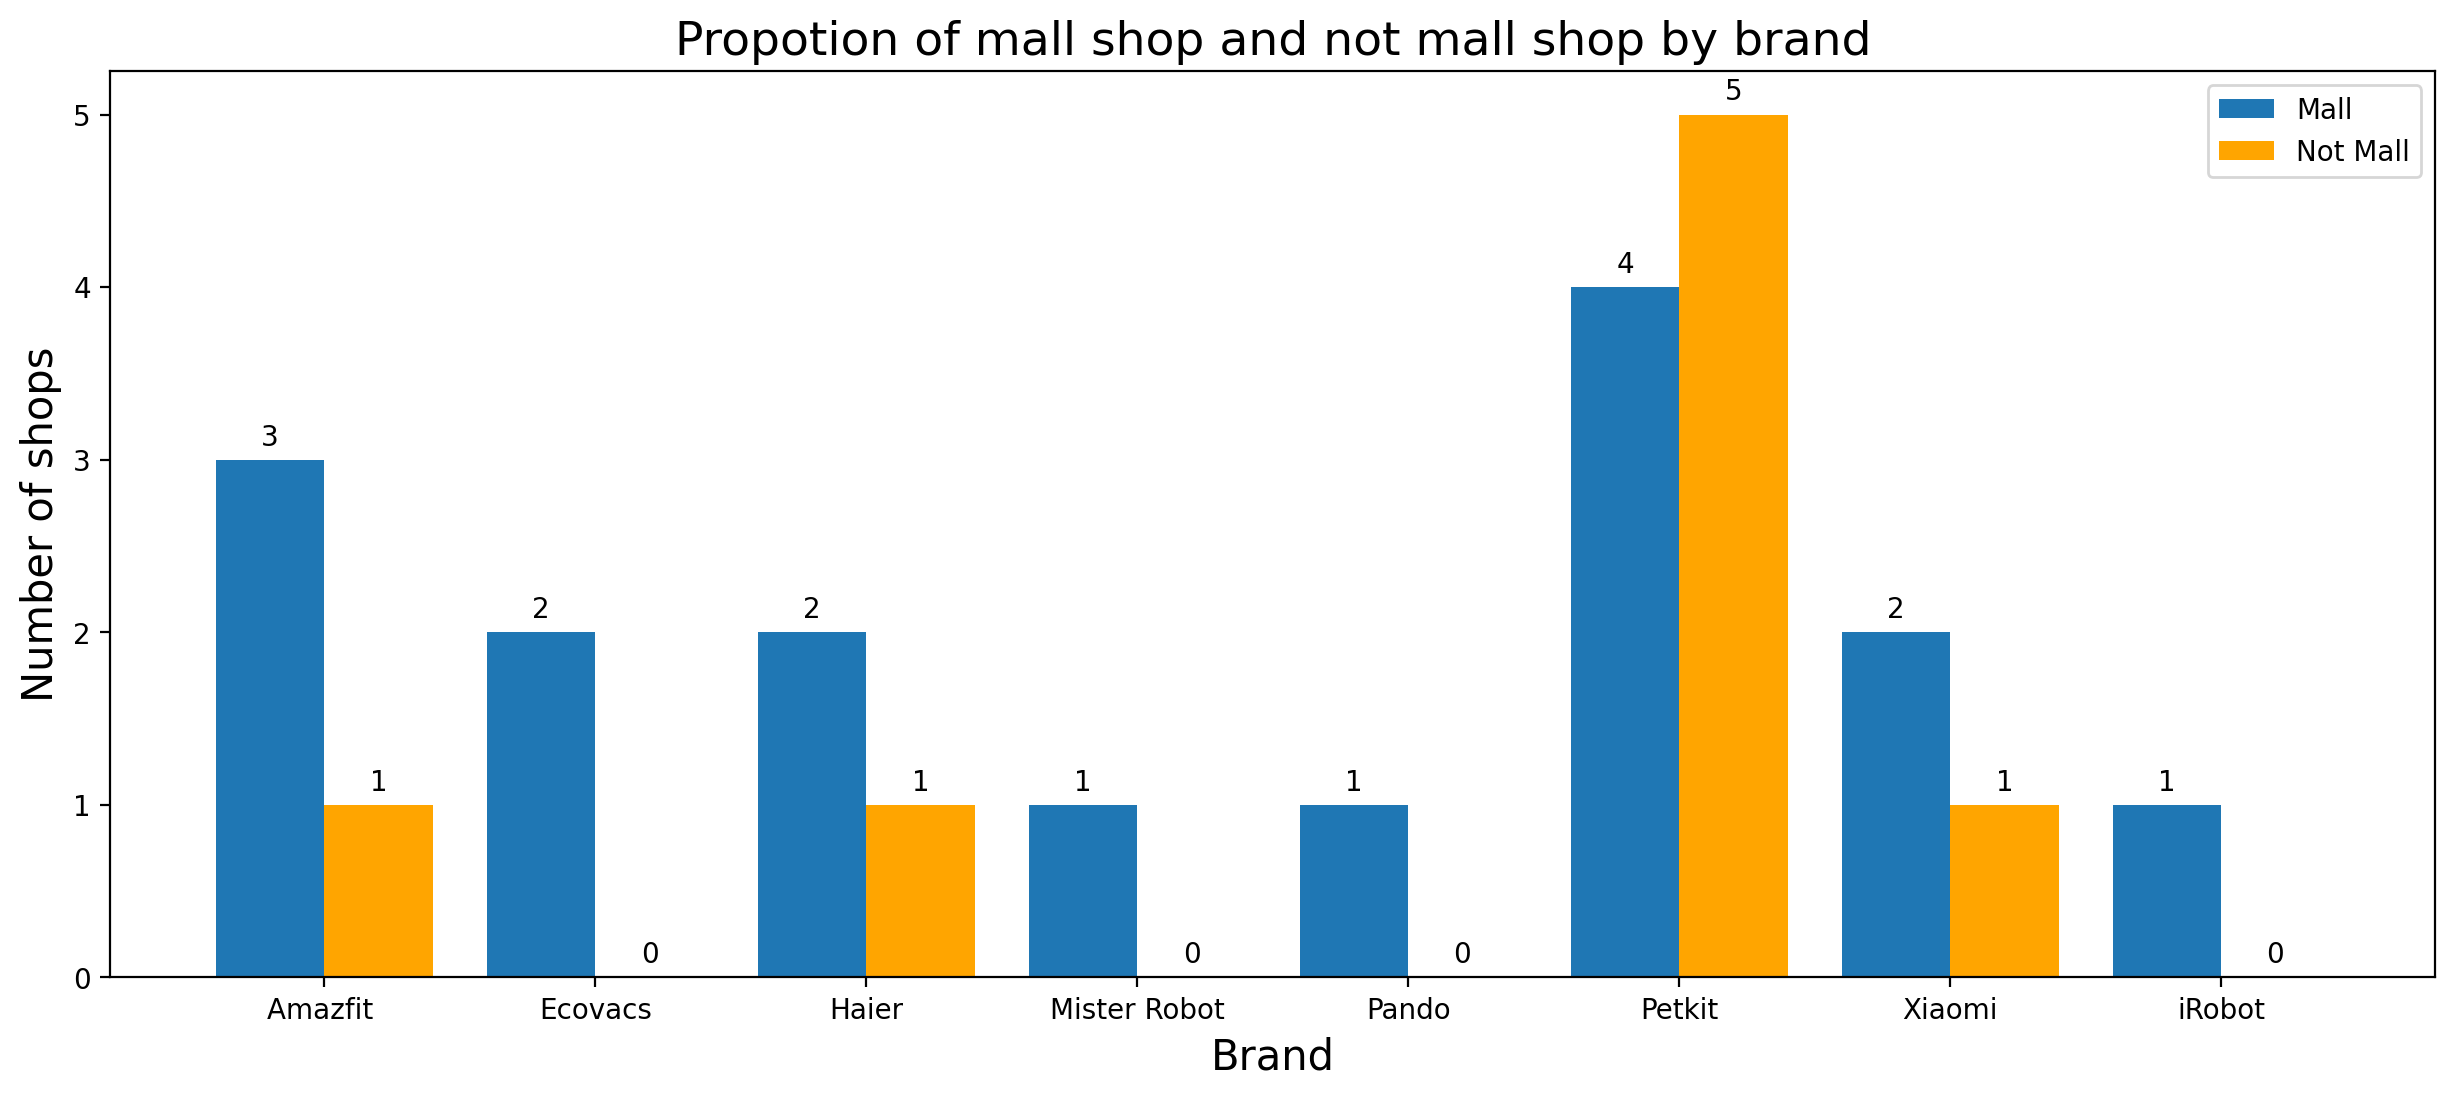

In [48]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=200)

x_labels = [i.split('(')[0] for i in official['brand'].unique().tolist()]

X_axis = np.arange(len(x_labels))

freq1 = plt.bar(X_axis - 0.2, official[official['is_official_shop']=='t']['count_ofiicial'], 0.4, label = 'Mall')
freq2 = plt.bar(X_axis + 0.2, official[official['is_official_shop']=='f']['count_ofiicial'], 0.4, label = 'Not Mall',color = 'orange')

for f in freq1:
    height = f.get_height()
    plt.annotate(f'{height:.0f}',
                xy=(f.get_x() + f.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for f in freq2:
    height = f.get_height()
    plt.annotate(f'{height:.0f}',
                xy=(f.get_x() + f.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
plt.title('Propotion of mall shop and not mall shop by brand', fontsize=17)
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Number of shops', fontsize=15)

plt.xticks(X_axis,x_labels)
plt.legend()
plt.show()

ในข้อมูลที่เรามีจะมีแบรนด์ Petkit ที่มีจำนวน official Mall และ Unofficial Mallที่พอๆกัน นอกจากนั้นจำนวนร้านส่วนใหญ่ในแต่ละแบรนด์จะเป็น official mall ส่วนใหญ่

## Campaign styles for each brand

#### Official Brand

In [49]:
count_overall_sale_mall = mega_sale_df[mega_sale_df['is_official_shop']=='t'].groupby(['brand'])[['brand']].count().rename(columns={'brand':'count_mega_sale'}).reset_index()
temp = mid_month_sale_df[mid_month_sale_df['is_official_shop']=='t'].groupby(['brand'])[['brand']].count().rename(columns={'brand':'count_mid_month'}).reset_index()
temp1 = pay_day_sale_df[pay_day_sale_df['is_official_shop']=='t'].groupby(['brand'])[['brand']].count().rename(columns={'brand':'count_pay_day'}).reset_index() 
count_overall_sale_mall = pd.concat([count_overall_sale_mall,temp['count_mid_month'],temp1['count_pay_day']],axis=1)
count_overall_sale_mall = pd.merge(count_overall_sale_mall,temp,how='left',on='brand').drop('count_mid_month_y',axis=1).rename(columns={'count_mid_month_x':'count_mid_month'})
count_overall_sale_mall = pd.merge(count_overall_sale_mall,temp1,how='left',on='brand').drop('count_pay_day_x',axis=1).rename(columns={'count_pay_day_y':'count_pay_day'})
count_overall_sale_mall = count_overall_sale_mall.fillna(0)
count_overall_sale_mall['count_pay_day'] = count_overall_sale_mall['count_pay_day'].astype(int)

In [50]:
count_overall_sale_mall

,brand,count_mega_sale,count_mid_month,count_pay_day
0,Amazfit (อเมซฟิต),18,13,27
1,Ecovacs(อีโคแวคส์),6,2,5
2,Haier(ไฮเออร์),4,5,15
3,Mister Robot(มิสเตอร์โรบอต),6,3,0
4,Pando(แพนโด้),14,5,21
5,Petkit(เพ็ทคิท),24,17,50
6,Xiaomi(เสี่ยวมี่),23,12,18


#### Unofficial brand

In [51]:
count_overall_sale_not_mall = mega_sale_df[mega_sale_df['is_official_shop']=='f'].groupby(['brand'])[['brand']].count().rename(columns={'brand':'count_mega_sale'}).reset_index()
temp = mid_month_sale_df[mid_month_sale_df['is_official_shop']=='f'].groupby(['brand'])[['brand']].count().rename(columns={'brand':'count_mid_month'}).reset_index()
temp1 = pay_day_sale_df[pay_day_sale_df['is_official_shop']=='f'].groupby(['brand'])[['brand']].count().rename(columns={'brand':'count_pay_day'}).reset_index() 
count_overall_sale_not_mall = pd.concat([count_overall_sale_not_mall,temp['count_mid_month'],temp1['count_pay_day']],axis=1)
count_overall_sale_not_mall = pd.merge(count_overall_sale_not_mall,temp,how='left',on='brand').drop('count_mid_month_y',axis=1).rename(columns={'count_mid_month_x':'count_mid_month'})
count_overall_sale_not_mall = pd.merge(count_overall_sale_not_mall,temp1,how='left',on='brand').drop('count_pay_day_x',axis=1).rename(columns={'count_pay_day_y':'count_pay_day'})
count_overall_sale_not_mall = count_overall_sale_not_mall.fillna(0)
count_overall_sale_not_mall['count_pay_day'] = count_overall_sale_not_mall['count_pay_day'].astype(int)

In [52]:
count_overall_sale_not_mall

,brand,count_mega_sale,count_mid_month,count_pay_day
0,Petkit(เพ็ทคิท),3,3,15


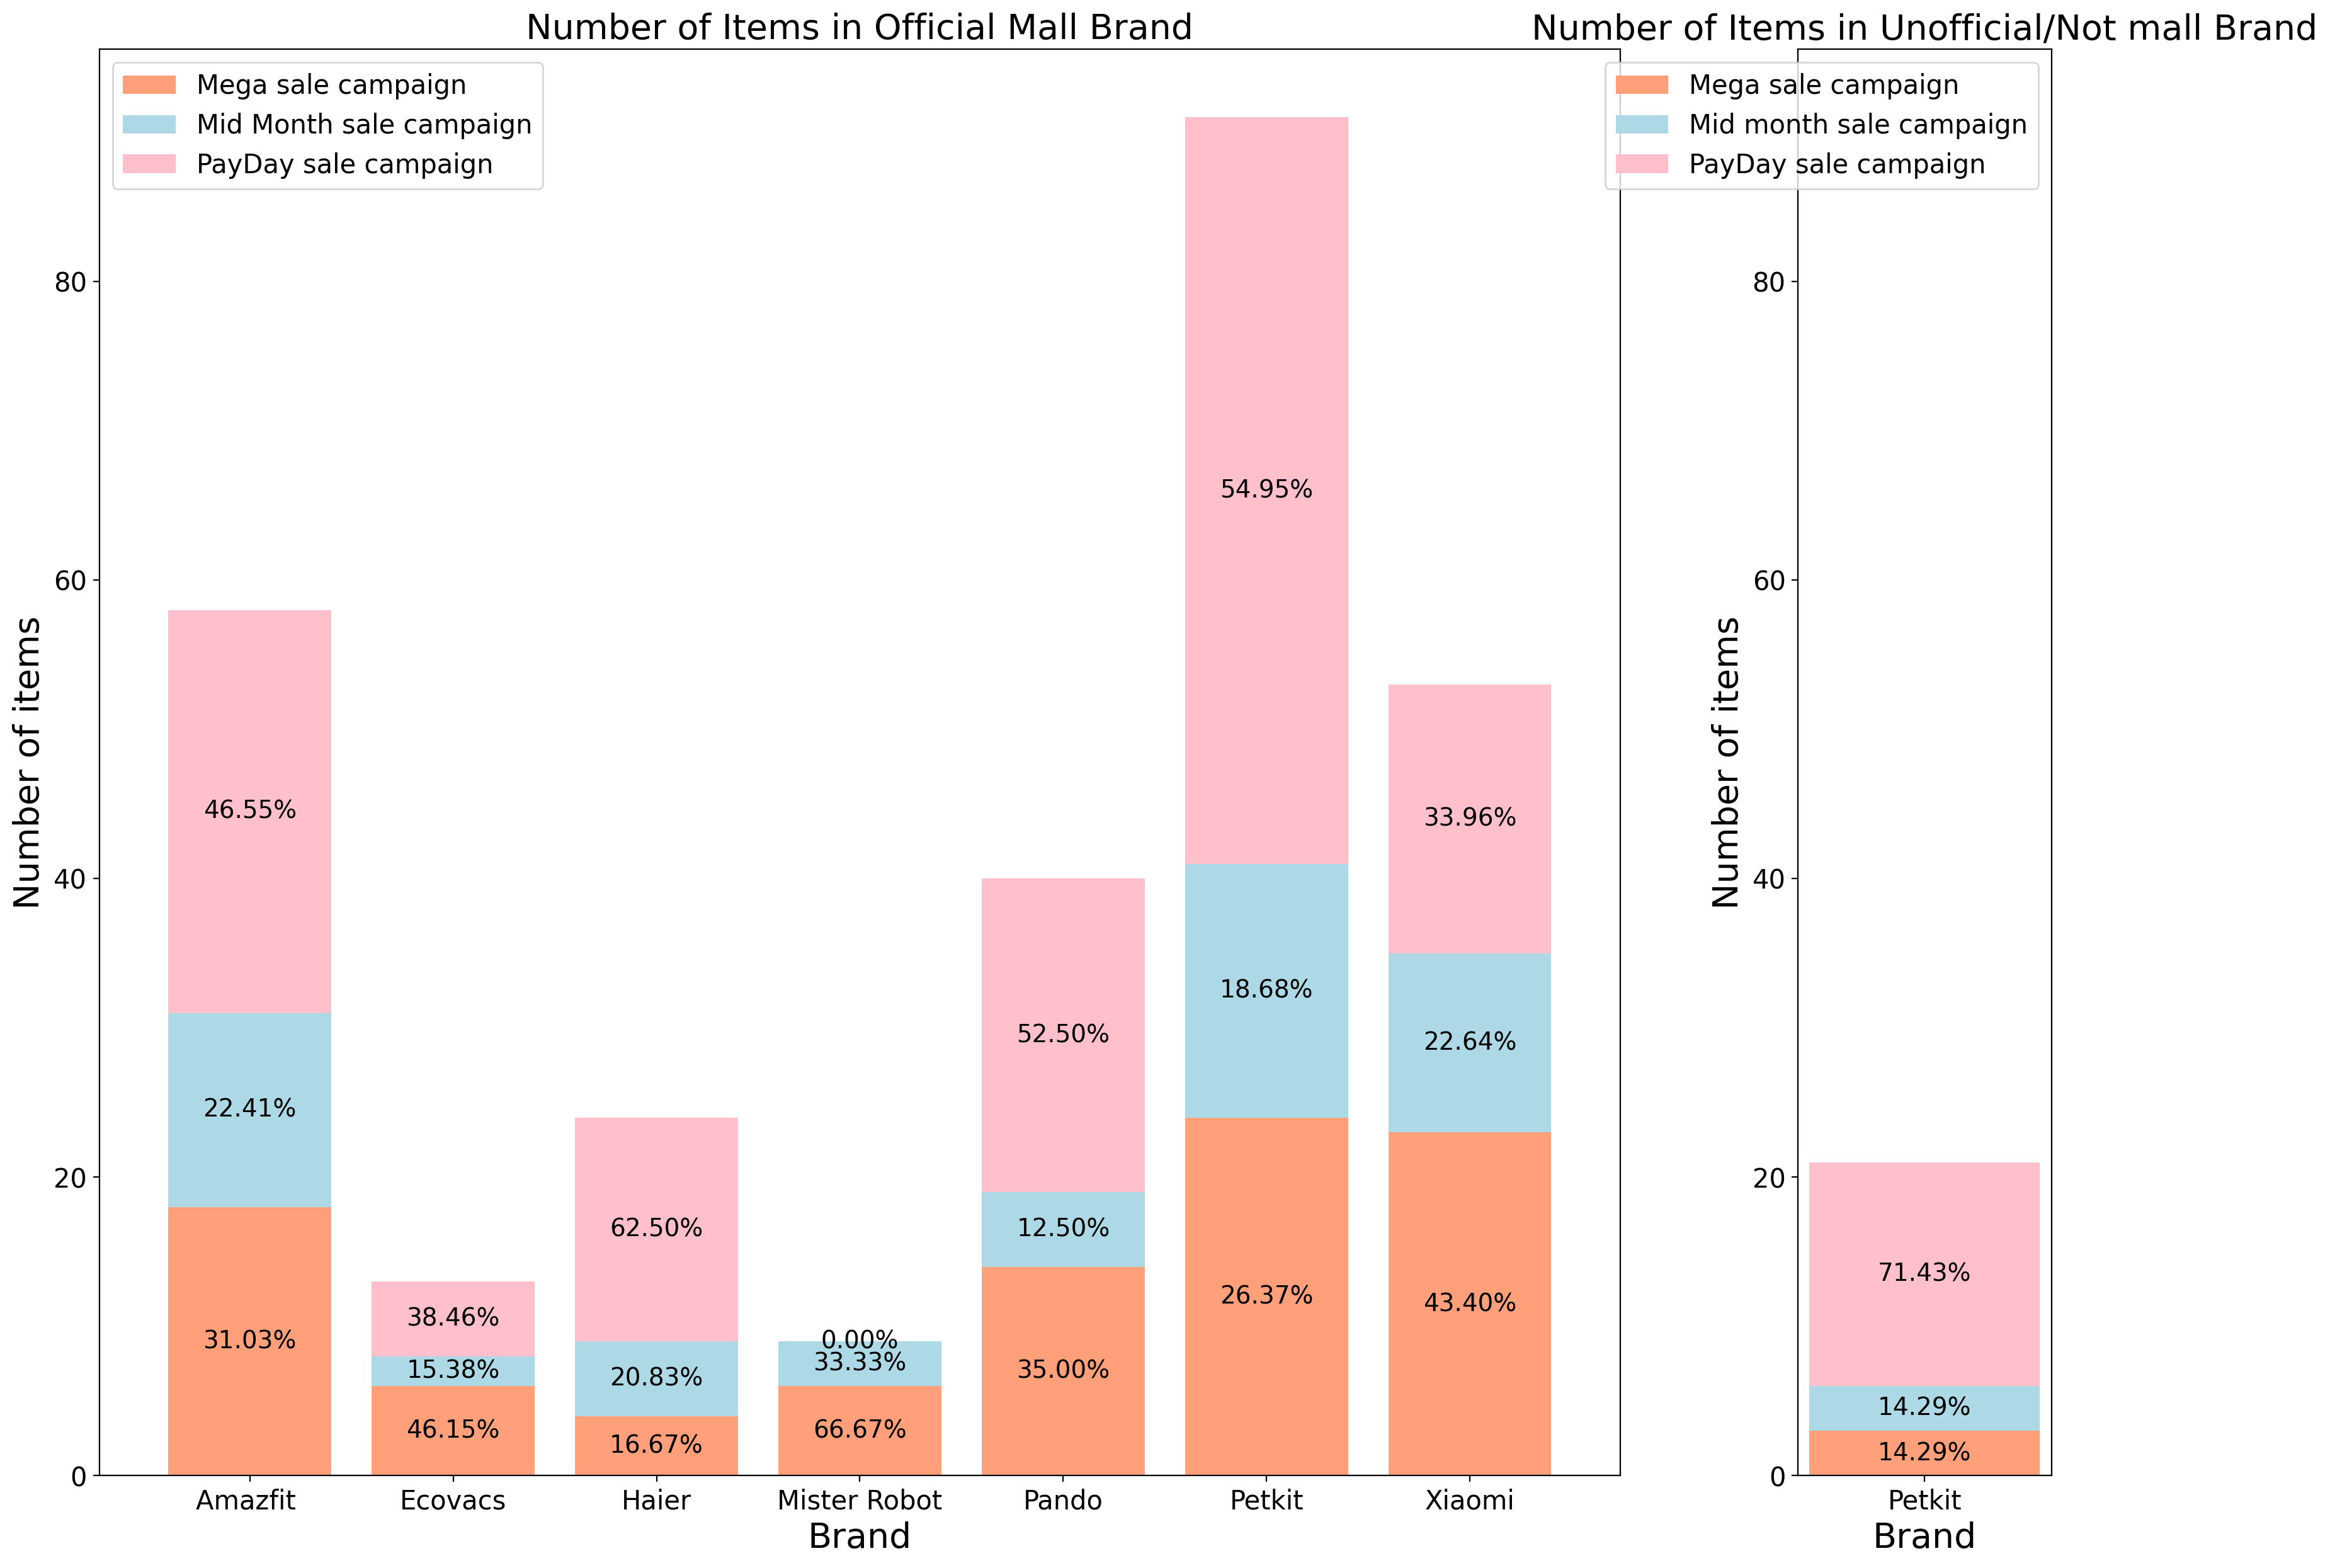

In [53]:
# figure(figsize=(20, 10), dpi=200)

fig, (a1, a2) = plt.subplots(1, 2,sharey=True,figsize=(20, 15), dpi=200,gridspec_kw={'width_ratios': [3, 0.5]})
a2.yaxis.set_tick_params(which='both', labelbottom=True)

label = [i.split('(')[0] for i in count_overall_sale_mall['brand']]
ax1 = a1.bar(label, count_overall_sale_mall['count_mega_sale'], color='lightsalmon', label='Mega sale campaign')
ax2 = a1.bar(label, count_overall_sale_mall['count_mid_month'], bottom=count_overall_sale_mall['count_mega_sale'], color='lightblue', label='Mid Month sale campaign')
ax3 = a1.bar(label, count_overall_sale_mall['count_pay_day'], bottom=count_overall_sale_mall['count_mega_sale']+count_overall_sale_mall['count_mid_month'], color='pink',label='PayDay sale campaign')
a1.set_title('Number of Items in Official Mall Brand', size=20)
a1.set_xlabel('Brand', size=20)
a1.set_ylabel('Number of items', size=20)

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()

    a1.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "{0:.2f}%".format((h1/(h1+h2+h3))*100), ha="center", va="center", color="black", fontsize=14)
    a1.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "{0:.2f}%".format((h2/(h1+h2+h3))*100), ha="center", va="center", color="black", fontsize=14)
    a1.text(r3.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "{0:.2f}%".format((h3/(h1+h2+h3))*100), ha="center", va="center", color="black", fontsize=14)

a1.legend(prop={'size': 15})

# a = plt.show()


label = [i.split('(')[0] for i in count_overall_sale_not_mall['brand']]
ax1 = a2.bar(label, count_overall_sale_not_mall['count_mega_sale'], color='lightsalmon', label = 'Mega sale campaign')
ax2 = a2.bar(label, count_overall_sale_not_mall['count_mid_month'], bottom=count_overall_sale_not_mall['count_mega_sale'], color='lightblue', label = 'Mid month sale campaign')
ax3 = a2.bar(label, count_overall_sale_not_mall['count_pay_day'], bottom=count_overall_sale_not_mall['count_mega_sale']+count_overall_sale_not_mall['count_mid_month'], color='pink', label = 'PayDay sale campaign')
a2.set_title('Number of Items in Unofficial/Not mall Brand', size=20)
a2.set_xlabel('Brand', size=20)
a2.set_ylabel('Number of items', size=20)

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()

    a2.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "{0:.2f}%".format((h1/(h1+h2+h3))*100), ha="center", va="center", color="black", fontsize=14)
    a2.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "{0:.2f}%".format((h2/(h1+h2+h3))*100), ha="center", va="center", color="black", fontsize=14)
    a2.text(r3.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "{0:.2f}%".format((h3/(h1+h2+h3))*100), ha="center", va="center", color="black", fontsize=14)

a2.legend(prop={'size': 15})

a1.tick_params(axis='both', labelsize=15)
a2.tick_params(axis='both', labelsize=15)
# plt.setp(a2.get_yticklabels(), visible=True)

# a = plt.show()

การเข้าร่วม campaign ทั้ง 3 สามารถบอกได้ดังนี้
- Payday ที่การทำ Flash sale สูงที่สุดเนื่องจากมีจำนวนวันในการทำและมีระยะเวลาในการทำสูงที่สุด (ข้อ 4)
- แบรนด์ที่การเข้าร่วม campaign คือ Petkit รองลงมาคือ Amazfit และ Xiaomi
- ร้านค้าที่ไม่เป็น official mall จะมีการเข้าร่วมเพียงหนึ่งแบรนด์ คือ Petkit และ ทำ flash sale ใน pay day เยอะที่สุด

ร้านค้าส่วนใหญ่ที่เข้าร่วมทั้ง 3 campaign จะเป็น official mall และ pay day จะมีการทำ flash sale สูงที่สุด

# 7. Relationship between discount and sales
ความสัมพันธ์ของการลดราคากับจำนวนสินค้าที่ขายได้

In [54]:
df = pd.read_csv('shopee_project.csv')
unique_id = []
for i in df['itemid'].unique().tolist():
    if len(df[df['itemid']==i]['modelid'].unique()) == 1:
#         print(i)
        unique_id.append(i)
df['brand'] = df['brand'].replace('Petkit(เพ็ทคิต)','Petkit(เพ็ทคิท)')
df = df[df['itemid'].isin(unique_id)].reset_index(drop=True)

In [55]:
def extract_year(row):
    date = datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
    return date.strftime('%Y')

In [56]:
df['year'] = df['ingest_date'].apply(extract_year)
df = df[df['year']=='2022']

In [57]:
# Preview dataframe before calculate sales, stock ,discount, duration of flashsale
df[df['flash_sale'].notnull()][['modelid','ingest_date','stock','flash_sale','price']][:10]

,modelid,ingest_date,stock,flash_sale,price
56,115174576667,2022-09-09 01:00:00,6,"{'price_before_discount': 1499000000, 'hidden_...",11490
57,91345241895,2022-09-09 01:00:00,9,"{'price_before_discount': 2141900000, 'hidden_...",11900
58,172837567688,2022-09-09 01:00:00,30,"{'price_before_discount': 2141900000, 'hidden_...",11900
179,91345241895,2022-10-17 12:00:01,10,"{'price_before_discount': 2141900000, 'hidden_...",10900
180,91345241895,2022-10-17 12:00:01,10,"{'price_before_discount': 2141900000, 'hidden_...",10900
215,171396661950,2022-09-09 00:00:00,50,"{'price_before_discount': 1700000000, 'hidden_...",11500
217,90444301281,2022-09-09 00:00:00,40,"{'price_before_discount': 1890000000, 'hidden_...",14000
239,61970382186,2022-10-04 15:00:01,20,"{'price_before_discount': 1999900000, 'hidden_...",10590
242,44602375718,2022-10-04 15:00:01,5,"{'price_before_discount': 2141400000, 'hidden_...",11900
267,124955024348,2022-09-09 13:00:01,37,"{'price_before_discount': 2141900000, 'hidden_...",11900


In [62]:
sale_diff = pd.DataFrame(columns=['sale_stock','price_diff','hour_duration','modelid'])
for m_id in df[df['flash_sale'].notnull()]['modelid'].unique().tolist():
#     print('modelid:',modelid)
    modelid = m_id
    temp = df[df['modelid']==modelid].sort_values(['ingest_date'])[['modelid','ingest_date','stock','flash_sale','price']].reset_index(drop=True)
    n = 0

    sale_stock = []
    price_diff = []
    hour_duration = []
    for i in temp[temp['flash_sale'].notnull()].index.tolist():
#         print('current index',i)
        if n == 0:
            n+=1
            start_index = i
            start_stock = temp['stock'].loc[i]
            start_price = temp['price'].loc[i]
#             last_index = i
            hour = 1
        elif i - last_index > 1 or i == temp[temp['flash_sale'].notnull()].index.tolist()[-1]:
            if repeat == True:
                start_index = i
                start_stock = temp['stock'].loc[i]
                start_price = temp['price'].loc[i]
                last_index = i
                hour = 1
            else:
#                 print('---------------')
#                 print('start_index',start_index)
#                 print('last_index',last_index)
#                 print('start_stock ',start_stock,'last_stock ',last_stock)
#                 print(start_stock - last_stock)
                if start_index == 0:
                    pass
                else:
#                     print(temp['price'].loc[start_index - 1])
#                     print(start_price)
#                     print('hour_duration',hour)
#                     print('---------------')
                    sale_stock.append(start_stock - last_stock)
                    price_diff.append((temp['price'].loc[start_index - 1]-start_price)/temp['price'].loc[start_index - 1]*100)
                    hour_duration.append(hour)

                    start_index = i
                    start_stock = temp['stock'].loc[i]
                    start_price = temp['price'].loc[i]
                    last_index = i
                    hour = 1

            repeat = True

        else:
            repeat = False
            last_index = i
            last_stock = temp['stock'].loc[i]
            hour +=1

    temp_df = pd.DataFrame()
    temp_df['sale_stock'] = sale_stock
    temp_df['price_diff'] = price_diff
    temp_df['hour_duration'] = hour_duration
    temp_df['modelid'] = modelid
    
    sale_diff = sale_diff.append(temp_df)

In [63]:
sale_diff['sale_stock'] =  sale_diff['sale_stock']//sale_diff['hour_duration']

In [64]:
sale_diff = sale_diff[(sale_diff['price_diff']>=0) & (sale_diff['sale_stock']>=0)]

Text(0, 0.5, 'Number of product sales')

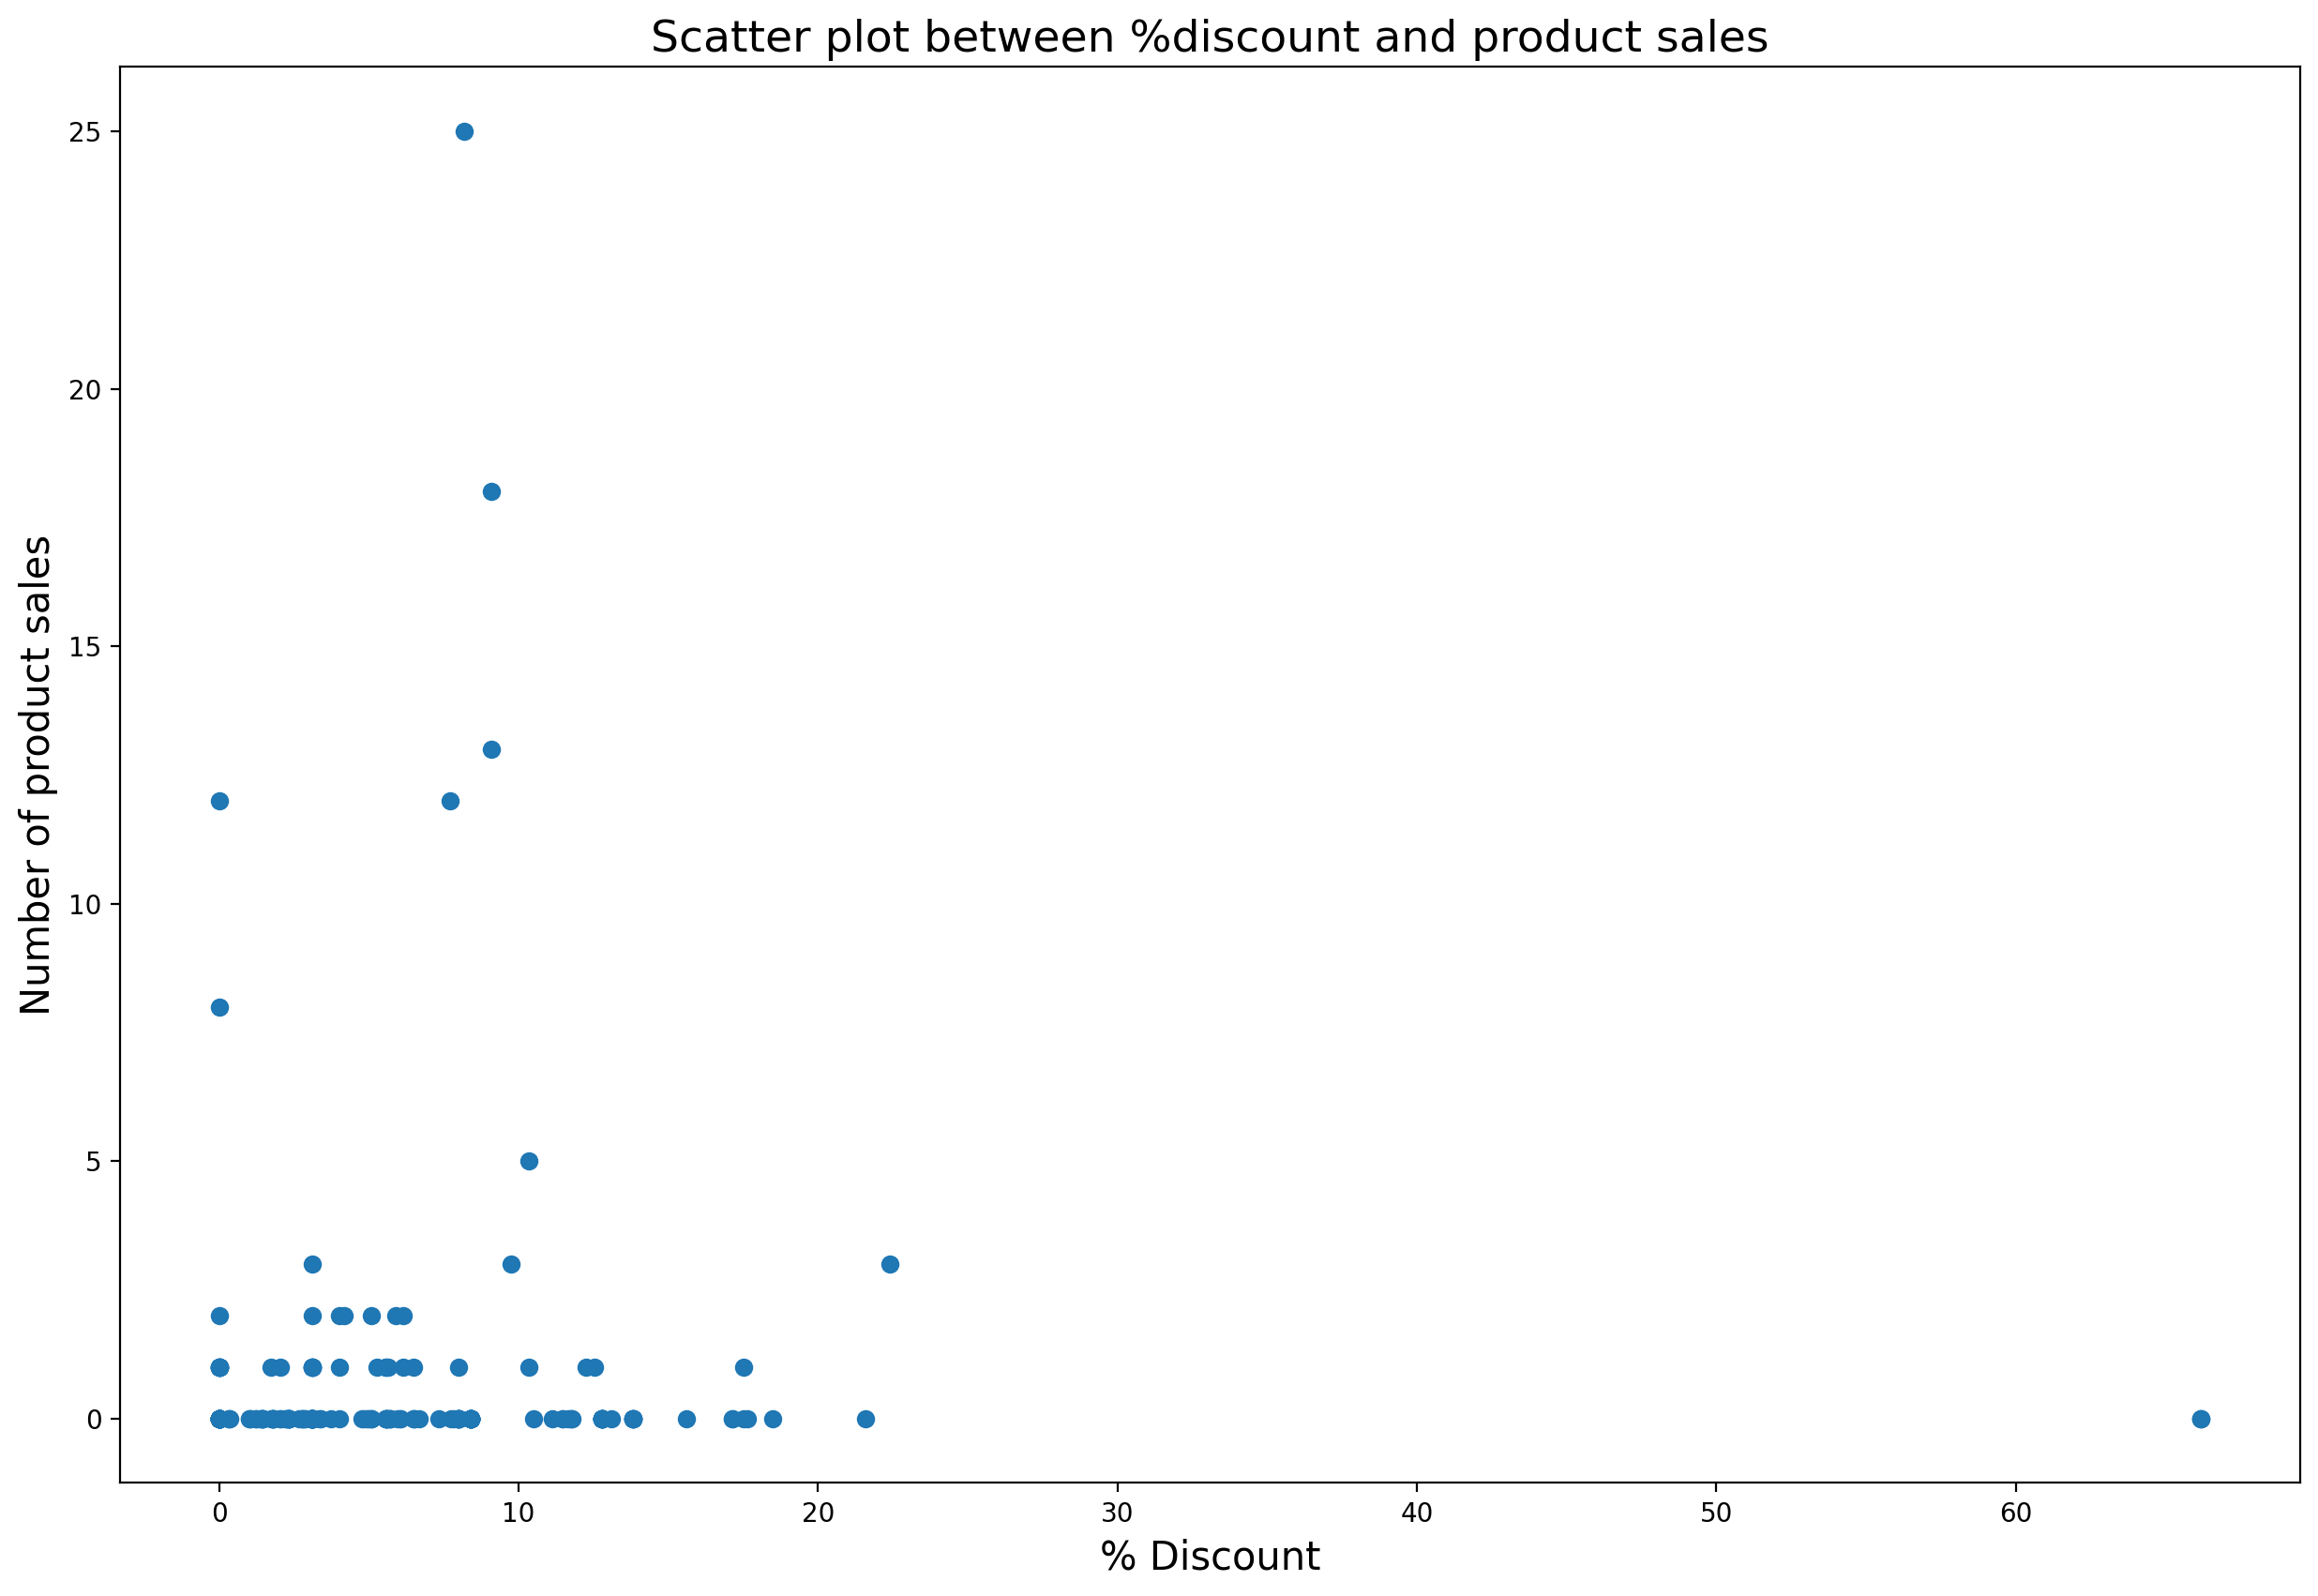

In [65]:
figure(figsize=(15, 10), dpi=200)
plt.scatter(sale_diff['price_diff'], sale_diff['sale_stock'])
plt.title('Scatter plot between %discount and product sales', fontsize=17)
plt.xlabel('% Discount', fontsize=15)
plt.ylabel('Number of product sales', fontsize=15)
# _ = plt.xticks(range(0,70,1))


ตัด outliner ที่เป็นข้อมูลที่ไม่มีความสำคัญออก เพื่อให้สามารถขยายกราฟให้ใหญ่มากขึ้นได้

In [66]:
sale_diff = sale_diff[(sale_diff['price_diff']>=0) & (sale_diff['sale_stock']>=0) & (sale_diff['price_diff']<50)]

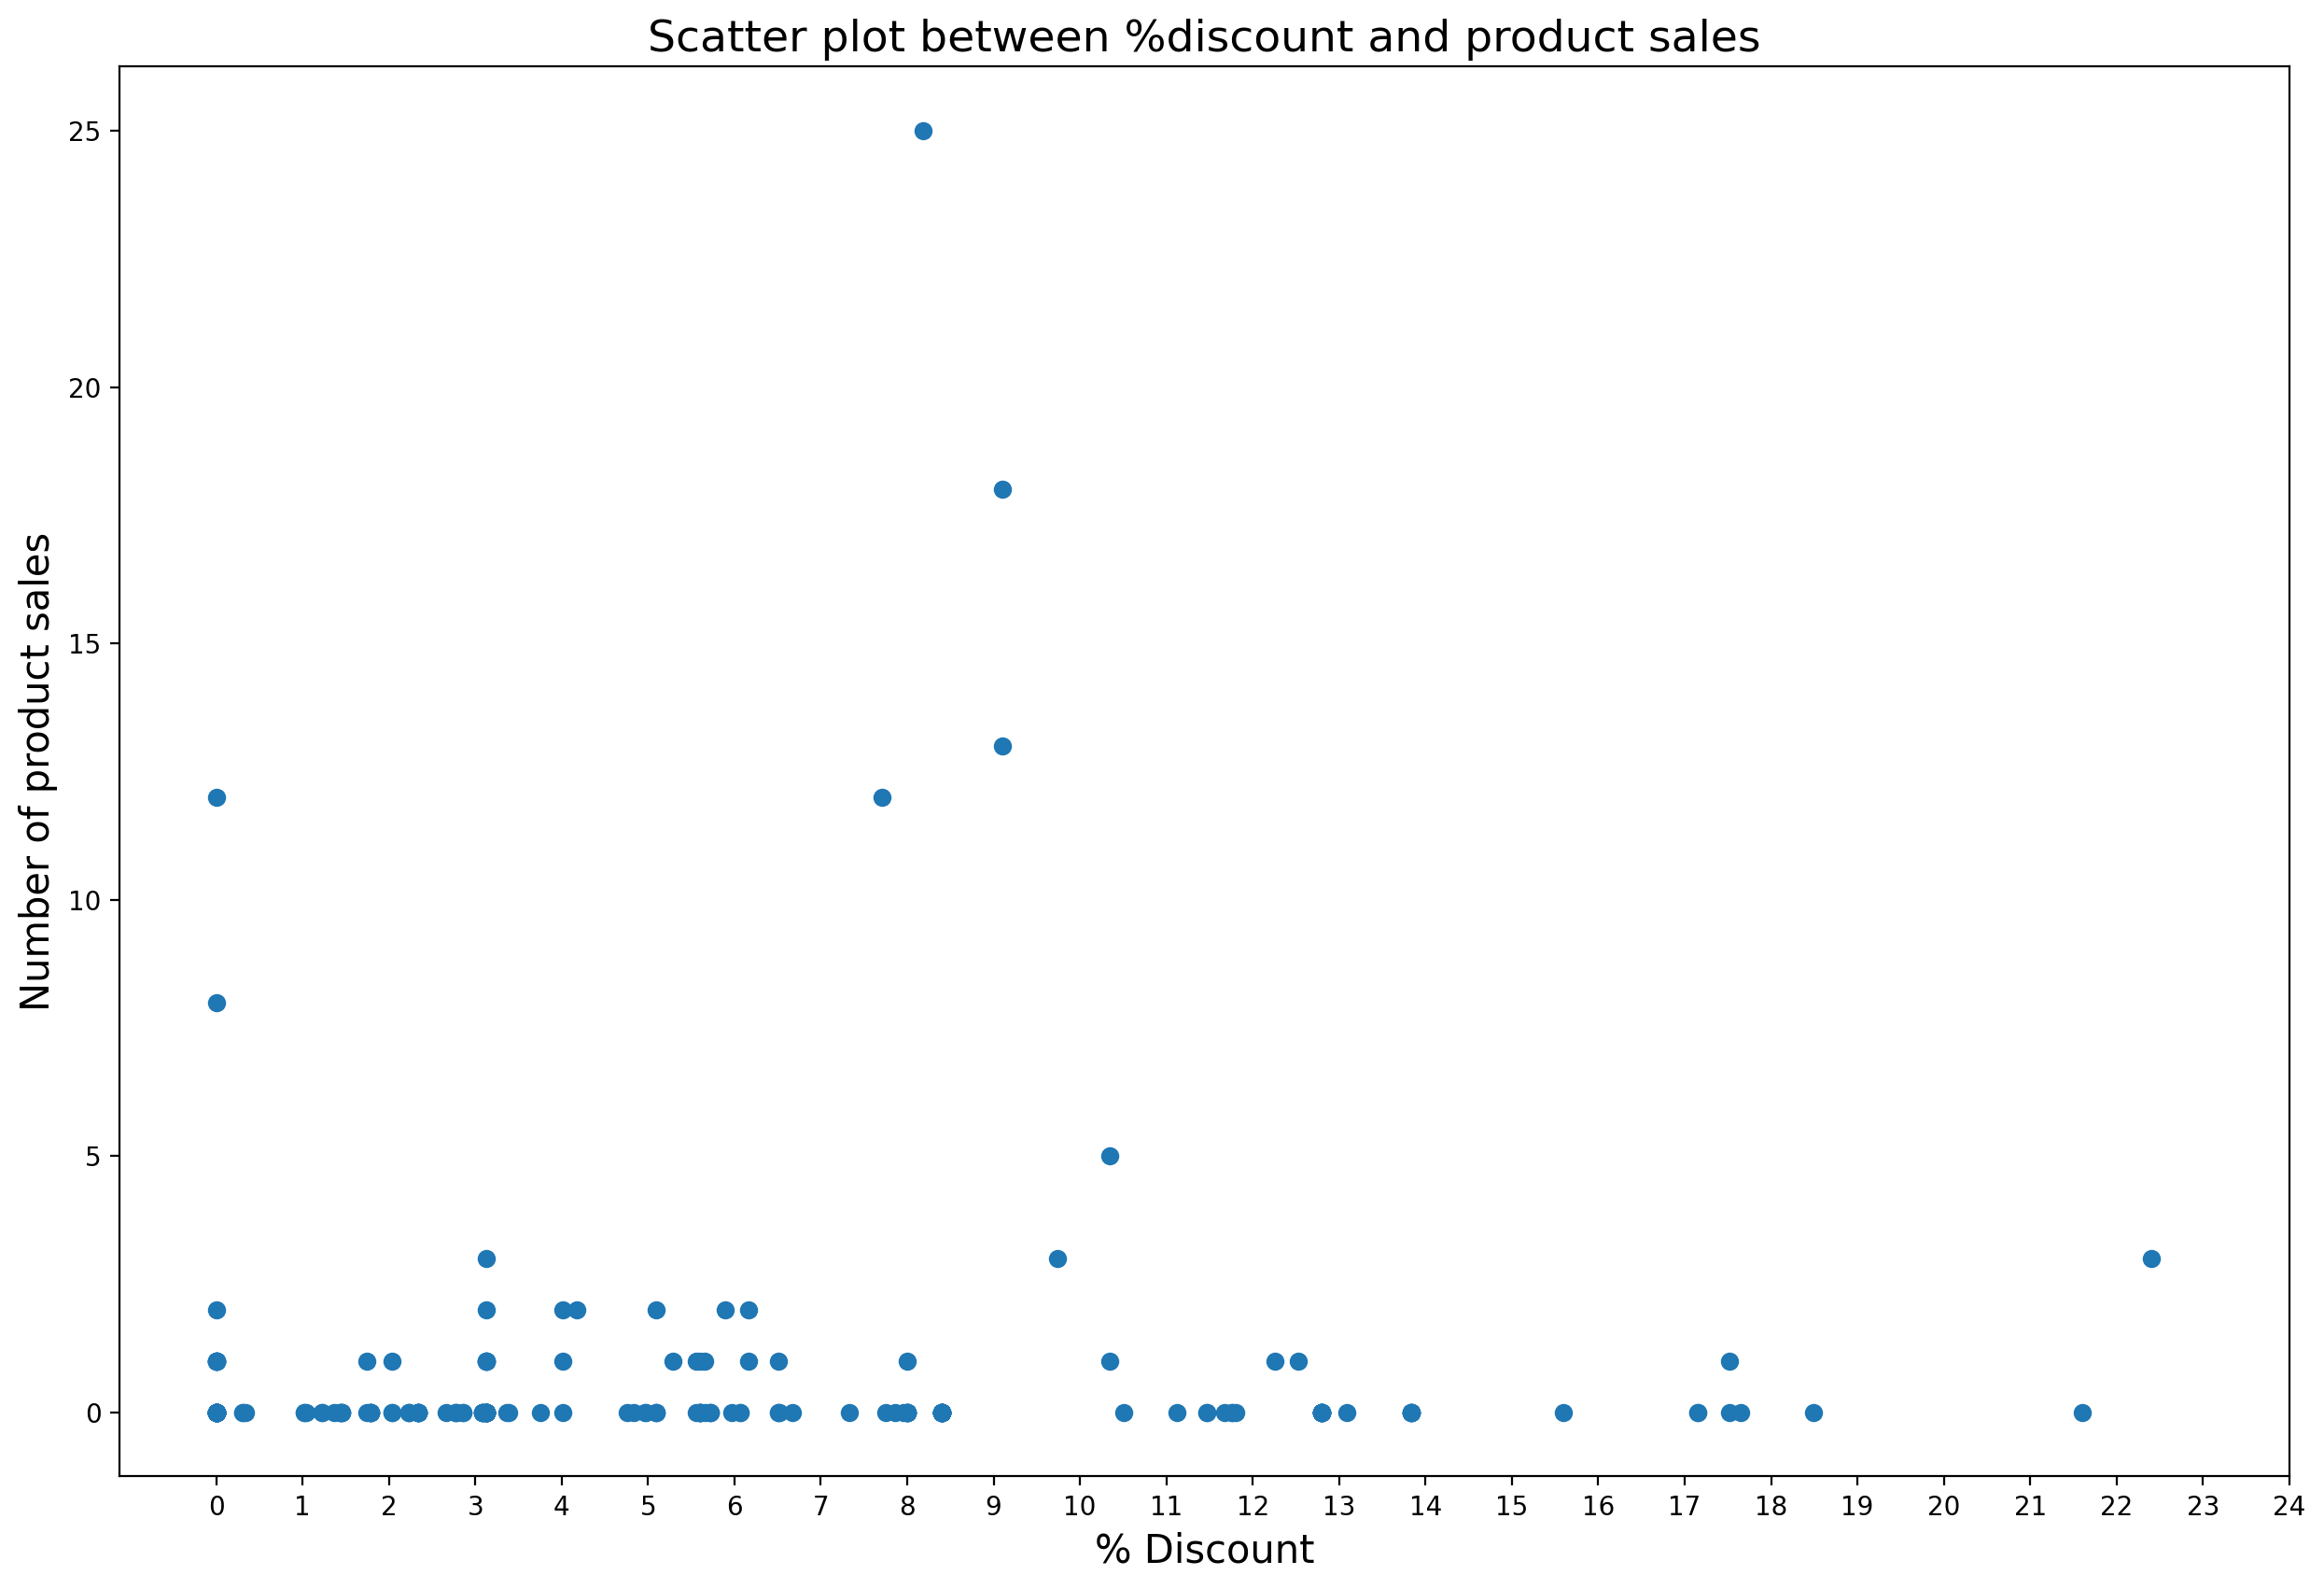

In [67]:
figure(figsize=(15, 10), dpi=200)
plt.scatter(sale_diff['price_diff'], sale_diff['sale_stock'])
plt.title('Scatter plot between %discount and product sales', fontsize=17)
plt.xlabel('% Discount', fontsize=15)
plt.ylabel('Number of product sales', fontsize=15)
_ = plt.xticks(range(0,25,1))


ส่วนลดในช่วง 8-10% มีผลต่อยอดขายสินค้า ทำให้สินค้าขายได้มากกว่าปกติ 2-3 เท่า
ส่วนลดเป็นเปอร์เซ็นต์ในช่วงอื่นไม่ได้มีผลกับจำนวนสินค้าที่ขายมากนัก

# Summary

1. วันที่ทำ flash sale บ่อยที่สุด 25 เที่ยงคืน 15 เที่ยงคืน
2. แคมเปญที่ทำแฟลชเซลบ่อยที่สุดคือ PayDay
3. วันและเวลาที่ทำแฟลชเซลบ่อยของ PayDay - 25-00, 30-12, 25-12, 27-12
4. mega sale จะทำแฟลชเซลบ่อยกว่า mid month sale แต่จำนวนชั่วโมงในการแฟลชเซลน้อยกว่า mid month 
5. PayDay นิยมทำแฟลชเซลในช่วงเวลากลางวัน 12, 18 ส่วน mega, mid month ทำแฟลชเซลคล้ายๆกัน นิยมทำในช่วงเวลากลางคืน 00:00-02:00
6. official brand ส่วนมากจะนิยมทำแฟลชเซลในแคมเปญ Mega sale และ PayDay มากกว่า Midmonth
7. ส่วนลด 8-10% มีผลกับยอดขายมากที่สุด